In [4]:
import pandas as pd
import sklearn
from pandas_profiling import ProfileReport
import pandas_profiling
import xgboost as xgb
import matplotlib.pyplot as plt
import random
import math
import pickle
import statistics

import numpy as np
from numpy import interp
from sklearn.metrics import accuracy_score, auc, average_precision_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score

from Programlib import Program
import Programlib

In [5]:
data = pd.read_csv('CreditCardFraud/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [7]:
clf = xgb.XGBClassifier(use_label_encoder=False)
#fit_params = {eval_metric: 'logloss'}

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Data IO and generation

# Import some data to play with
def draw_roc_cv(clf, cv, X, y):

    X = X.values
    y = y.values
    n_samples, n_features = X.shape
    # #############################################################################
    # Classification and ROC analysis

    # Run classifier with cross-validation and plot ROC curves
    classifier = clf

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        viz = RocCurveDisplay.from_estimator(
            classifier,
            X[test],
            y[test],
            name="ROC fold {}".format(i),
            alpha=0.3,
            lw=1,
            ax=ax,
        )
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )

    ax.set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic",
    )
    ax.legend(loc=(1.05, 0.05))
    plt.show()
    
def draw_cv_pr_curve(classifier, cv, X, y, title='PR Curve'):
    """
    Draw a Cross Validated PR Curve.
    Keyword Args:
        classifier: Classifier Object
        cv: StratifiedKFold Object: (https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation)
        X: Feature Pandas DataFrame
        y: Response Pandas Series
        
    Largely taken from: https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
    """
    y_real = []
    y_proba = []

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        precision, recall, _ = precision_recall_curve(y.iloc[test], probas_[:, 1])
        
        # Plotting each individual PR Curve
        plt.plot(recall, precision, lw=1, alpha=0.3,
                 label='PR fold %d (AUC = %0.2f)' % (i, average_precision_score(y.iloc[test], probas_[:, 1])))
        
        y_real.append(y.iloc[test])
        y_proba.append(probas_[:, 1])

        i += 1
    
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    
    precision, recall, _ = precision_recall_curve(y_real, y_proba)

    plt.plot(recall, precision, color='b',
             label=r'Precision-Recall (AUC = %0.2f)' % (average_precision_score(y_real, y_proba)),
             lw=2, alpha=.8)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc=(1.05, 0.05))
    plt.show()

In [9]:
class Instruction:
    
    # def __init__(self, name, op1, op2, dest):
    #     self.name = name
    #     self.op1  = op1    #index of register for operand 1
    #     self.op2  = op2    #index of register for operand 2
    #     self.dest = dest   #destination register 
        
    def __init__(self, num_wreg, num_creg, arity=2, num_ireg=1, instruction_set=['Add', 'Sub', 'Mul', 'Div', 'Sin', 'Mean', 'Copy', 'Sqrt', 'Sqr', 'Max', 'Min', 'Exp', 'Log', 'Lt', 'Gte', 'Eq', 'Neq', 'And', 'Or', 'Not', 'If'], _random=True, name="", op1=None, op2=None, dest=None):
        self.name = random.choice(instruction_set)
        self.op1  = random.randint(0, num_wreg+num_creg+num_ireg-1)    #index of register for operand 1
        self.op2  = random.randint(0, num_wreg+num_creg+num_ireg-1)    #index of register for operand 2
        self.dest = random.randint(0, num_wreg-1)                      #destination register
        self.effective = False
        self.num_wreg = num_wreg
        self.num_creg = num_creg
        self.num_ireg = num_ireg
        if not _random:
            self.name = name
            self.op1  = op1
            self.op2  = op2
            self.dest = dest
            
    def _set_name(self, name):
        self.name = name
        
    def _set_op1(self, op):
        if -1< op < self.num_wreg+self.num_creg:
            self.op1 = op
        
    def _set_op2(self, op):
        if -1< op < self.num_wreg+self.num_creg:
            self.op2 = op
            
    def _set_dest(self, op):
        if -1< op < self.num_wreg:
            self.dest = op
        
    def __repr__(self):
        return(self.name + '(' + str(self.op1) + ',' + str(self.op2) + ',' + str(self.dest) + ')')
    
    def _saturate(self, num, low=-1.0*(10**250), high=1.0*(10**250)):
        """ Avoid inf. Can generalize to saturate at other numbers """
        if num > high:
            return high
        if num < low:
            return low
        else:
            return num
    
    def execute(self, register_set):
        """ This can return (return_value, destination_register)  """
        if self.name == 'Add':
            return (self._saturate(register_set[self.op1] + register_set[self.op2]), self.dest)
        elif self.name == 'Sub':
            return (self._saturate(register_set[self.op1] - register_set[self.op2]), self.dest)
        elif self.name == 'Mul':
            return (self._saturate(register_set[self.op1] * register_set[self.op2]), self.dest)
        elif self.name == 'Div':
            if(register_set[self.op2] == 0):
                return(register_set[self.dest], self.dest)
            return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)
        elif self.name == 'Sin':
            return (self._saturate(math.sin(register_set[self.op1])), self.dest)
        elif self.name == 'Mean':
            if self.op1 < self.op2:
                op1 = self.op1
                op2 = self.op2
            else:
                op1 = self.op2
                op2 = self.op1
            l = [register_set[i] for i in range(op1, op2+1)]
            return (self._saturate(statistics.fmean(l)), self.dest)
        elif self.name == 'Copy':
            return (register_set[self.op1], self.dest)
        elif self.name == 'Sqrt':
            if register_set[self.op1] < 0:
                return (register_set[self.op1], self.dest)
            return (self._saturate(math.sqrt(register_set[self.op1])), self.dest)
        elif self.name == 'Max':
            if self.op1 < self.op2:
                op1 = self.op1
                op2 = self.op2
            else:
                op1 = self.op2
                op2 = self.op1
            l = [register_set[i] for i in range(op1, op2+1)]
            return (self._saturate(max(l)), self.dest)
        elif self.name == 'Min':
            if self.op1 < self.op2:
                op1 = self.op1
                op2 = self.op2
            else:
                op1 = self.op2
                op2 = self.op1
            l = [register_set[i] for i in range(op1, op2+1)]
            return (self._saturate(min(l)), self.dest)
        elif self.name == 'Sqr':
            try:
                ans = (self._saturate(register_set[self.op1]**2), self.dest)
            except OverflowError:
                ans = (10**10, self.dest)
            return ans
        elif self.name == 'Exp':
            try:
                ans = (self._saturate(math.exp(register_set[self.op1])), self.dest)
            except OverflowError:
                ans = (10**10, self.dest)
            return ans
        elif self.name == 'Log':
            if register_set[self.op1] <= 0:
                return (register_set[self.op1], self.dest)
            return (self._saturate(math.log(register_set[self.op1])), self.dest)
        elif self.name == 'Lt':
            return (float(register_set[self.op1] < register_set[self.op2]), self.dest)
        elif self.name == 'Gte':
            return (float(register_set[self.op1] >= register_set[self.op2]), self.dest)
        elif self.name == 'Eq':
            return (float(register_set[self.op1] == register_set[self.op2]), self.dest)
        elif self.name == 'Neq':
            return (float(register_set[self.op1] != register_set[self.op2]), self.dest)
        elif self.name == 'And':
            return (float(register_set[self.op1] and register_set[self.op2]), self.dest)
        elif self.name == 'Or':
            return (float(register_set[self.op1] or register_set[self.op2]), self.dest)
        elif self.name == 'Not':
            return (float(not register_set[self.op1]), self.dest)
        elif self.name == 'If':
            if(register_set[self.op1]):
                return (register_set[self.op1], self.op1)
            else:
                return (register_set[self.op1], -1)
 

In [12]:
def mut(program):
    #PROBABILITIES TO
    ADD_P = 0.235   #Add a random instruction in a random location
    REM_P = 0.185   #Delete a random instruction
    NAM_P = 0.181   #Change the name of an instruction (and therefore its type)
    ARG_P = 0.181   #Change an argument of an instruction
    SWP_P = 0.18   #Swap two instructions
    
    if random.random() < ADD_P:  #Add instruction  
        if (len(program.INST) < MAX_LENGTH):
            rand_inst = Instruction(len(program.WREG), len(program.CREG), instruction_set=program.IS)
            loc       = random.randint(0, len(program.INST))
            program.INST.insert(loc, rand_inst)
            
    if random.random() < REM_P:  #Remove instruction
        if (len(program.INST) > MIN_LENGTH):
            loc       = random.randint(0, len(program.INST)-1)
            program.INST.pop(loc)
            
    if random.random() < NAM_P:  #Change an instruction name
        if(len(program.INST) > 1):
            loc = random.randint(0, len(program.INST)-1)
            program.INST[loc]._set_name(random.choice(program.IS))
        
    if random.random() < ARG_P:   #Change argument to an instruction
        if(len(program.INST) > 1):
            inst_loc = random.randint(0, len(program.INST)-1)
            arg_loc  = random.randint(0,2)
            if arg_loc == 1:
                program.INST[inst_loc]._set_op1(random.randint(0, len(program.REG)-1))
            if arg_loc == 2:
                program.INST[inst_loc]._set_op2(random.randint(0, len(program.REG)-1))
            if arg_loc == 0:
                program.INST[inst_loc]._set_dest(random.randint(0, len(program.WREG)-1))
            
    if random.random() < SWP_P:   #Swap the index of two instructions
        if (len(program.INST) > 1):
            loc1 = random.randint(0, len(program.INST)-1)
            loc2 = random.randint(0, len(program.INST)-1)
            temp = program.INST[loc1]
            program.INST[loc1] = program.INST[loc2]
            program.INST[loc2] = temp
            
def XOver(prog1, prog2):
    """ Crossover Function chooses 2 random crossover points (one for each individual)
        Swaps the second part of program 2's instructions with the first part of program 1's instructions """
    #TODO: Make sure Xover cannot create programs that are too long!
    #Maybe determine the length of each program after loc1 and loc2 are selected and modify if one would be too long
    length_after_Xover_prog1 = MAX_LENGTH + 1
    length_after_Xover_prog2 = MAX_LENGTH + 1
    
    if ((len(prog1.INST) > 1) and (len(prog2.INST) > 1)):
        while(length_after_Xover_prog1 > MAX_LENGTH or length_after_Xover_prog2 > MAX_LENGTH):
            loc1 = random.randint(0, len(prog1.INST)-1)
            loc2 = random.randint(0, len(prog2.INST)-1)
            temp1 = prog1.INST[:loc1]
            temp2 = prog2.INST[loc2:]
            length_after_Xover_prog1 = len(temp2 + prog1.INST[loc1:])
            length_after_Xover_prog2 = len(prog2.INST[:loc2] + temp1)
        prog1.INST = temp2 + prog1.INST[loc1:]
        prog2.INST = prog2.INST[:loc2] + temp1
    

In [13]:
def f1(program, cases, labels):
   # print(type(program))
    fitness = 0
    outs    = []
    inputs  = [[] for i in range(len(cases))]
    if type(cases) == pd.core.frame.DataFrame:
        cases   = cases.values
        labels  = labels.values
    
    for classifier in range(NUM_CLASSIFIERS):
        for case in range(len(cases)):
            row = cases[case]
            #print(type(case))
            print(classifier)
            pred = classifiers[classifier].predict_proba(row.reshape((1,-1)))
            inputs[case].append(pred.tolist()[0][1])
            
    for row in range(len(inputs)):
        tv = labels[row]           #true value of sin for the fitness case
        #print(program)
        program.reset()             #return value of the program evaluated on the fitness case
        program._set_inputs(inputs[row])
        #print(inputs[row])
        #print(program)
        rv = program.execute()
        outs.append(rv) 
    if (max(outs) - min(outs) != 0):
        outs = [(float(i)-min(outs))/(max(outs)-min(outs)) for i in outs]
    elif max(outs) != 0:
        outs = [(float(i))/(max(outs)) for i in outs]
    fitness  = average_precision_score(labels, outs)

    return fitness
 
def f_first_layer(program, cases, labels):
    fitness = 0
    outs    = []
    #display(cases)
    inputs  = [[] for i in range(len(cases))]
    if type(cases) == pd.core.frame.DataFrame:
        cases   = cases.values
        labels  = labels.values
    for row in range(len(cases)):
        tv = labels[row]           #true value of sin for the fitness case
        #print(program)
        program.reset()             #return value of the program evaluated on the fitness case
        #print(program)
        #print(inputs[row])
        program._set_inputs(cases[row])
        #print(program)
        #print(inputs[row])
        #print(program)
        rv = program.execute()
        outs.append(rv) 
    if (max(outs) - min(outs) != 0):
        outs = [(float(i)-min(outs))/(max(outs)-min(outs)) for i in outs]
    elif max(outs) != 0:
        outs = [(float(i))/(max(outs)) for i in outs]
    fitness  = average_precision_score(labels, outs)
    return fitness

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin
import pickle
class LinearGPClassifier(BaseEstimator, ClassifierMixin):
    
    def _more_tags(self):
        return {'binary_only': True}
    
    def __init__(self, 
                 reg_init='r', 
                 IS=['Add', 'Sub', 'Mul', 'Div', 'Sin', 'Mean', 'Copy', 'Sqrt', 'Sqr', 'Max', 'Min', 'Exp', 'Log', 'Lt', 'Gte', 'Eq', 'Neq', 'And', 'Or', 'Not', 'If'], 
                 inputs=1):
        self.reg_init='z'
        self.IS = IS
        self.inputs = inputs
        
    
    def get_estimator(self):
        self.estimator = Program(reg_init=self.reg_init, IS=self.IS, inputs = self.inputs)
        
    def fit(self, X, y, num_generations=500, POP_SIZE=100, ELITE_K=10, MAX_LENGTH=64, MIN_LENGTH=1, XOVER_P=0.85, min_max=-1, random_state=42, logfile_name='log.txt', fitness_function=f_first_layer, verbose=0):
        self.get_estimator()
        #breakpoint()
        labels = set(y)
        self.verbose_=verbose
        self.classes_ = labels
        orig_y = y
        if labels != set([0,1]):
            m = min(labels)
            M = max(labels)
            y = [(v-m)/(M-m) for v in y]
        if len(X) == 0:
            raise ValueError("Empty Dataset Passed")
        if type(X) == pd.core.frame.DataFrame and X.empty:
            raise ValueError("Empty DataFrame Passed")
        population   = [Program(reg_init=self.reg_init, IS=self.IS, inputs = self.inputs) for i in range(POP_SIZE)] # Start with a population of 500 random programs
        best_fitness = -1                     # Start this very high since even a random program will beat it
        best_prog    = None                       # Keep track of the best program
        tolerance    = 1                          # Stop searching when the best program has a fitness less than 1 (we want to minimize error)
        generation   = 1

        best_fitnesses_generation = []
        avg_fitnesses_generation  = []

        #TODO: Consider a fitness function that encourages putting DIFFERENT functions of the input in different registers. 10_000
        #      is too big for a population and XOVER and mutation probabilities should be lowered.



        #logfile = open('log3.txt', 'w+')

        while (generation < num_generations + 1):
            X_train, cases, y_train, labels = train_test_split(X, y, stratify=y, test_size=0.00795)#, random_state=random_state)
            if (generation % 100 < 10):
                dumpfile='./saved_generations_fraud/generation'+str(generation)+'.pkl'
                with open(dumpfile, 'wb+') as du:
                    pickle.dump(population, du)
            print('Generation: ', generation)
            this_gen_fitness= []
            ##############################################
            #Evaluate Fitness for the population
            #
            counter = 0
            for individual in population:
                ind_fit = fitness_function(individual, cases, labels)
                this_gen_fitness.append(ind_fit)
                if ind_fit > best_fitness:
                    if verbose > 1:
                        print('----------NEW BEST FITNESS---------------')
                        print(ind_fit)
                        print(individual)
                        print('---------- EFFECTIVE PROGRAM ---------------')
                    individual.print_effective_program()
                    best_fitness = ind_fit
                    best_prog    = individual
                if verbose > 2:
                    print('population member ', counter, '/', POP_SIZE)
                counter+=1
            best_fitnesses_generation.append(max(this_gen_fitness))
            best_program_this_gen = population[np.argmax(this_gen_fitness)]
            avg_fitnesses_generation.append(sum(this_gen_fitness)/len(this_gen_fitness))
            # logfile.write('-----------------GENERATION ' + str(generation) + '---------------------------\n')
            # logfile.write("Fitnesses: [" + ", ".join(str(item) for item in this_gen_fitness) + "]\n")
            # logfile.write('best fitness: ' +  str(best_fitnesses_generation[-1]) + "\n")
            # logfile.write('avg fitnesses: ' +  str(avg_fitnesses_generation[-1]) + "\n")
            idxs             = [i for i in range(POP_SIZE)]
            fittest          = sorted(idxs, key=lambda x: this_gen_fitness[x], reverse = True) 
            if verbose > 0:
                print('Best Fitness: ', best_fitnesses_generation[-1])
                print('Avg  Fitness: ', avg_fitnesses_generation[-1])
            elite = fittest[:ELITE_K]#Selection.elite_selection(population, f1, CASES, k=int(POP_SIZE/10))
            #tournament = Selection.tournament_selection(population, f1, CASES, pop_fitnesses=this_gen_fitness, next_gen_size=int((POP_SIZE*8)/10))
           # randos     = [Program(reg_init='z', IS=['Add', 'Sub', 'Mul', 'Div', 'Mean', 'Copy', \
                                         # 'Sqrt', 'Sqr', 'Max', 'Min', 'Exp', 'Log', 'Lt', 'Gte', \
                                         # 'Eq', 'Neq', 'And', 'Or', 'Not', 'If']) for i in range(int(POP_SIZE/10))]

            next_gen= [population[e] for e in elite]
            if verbose > 3:
                print('Elite Carried Forward')
                
#             while(len(next_gen) < POP_SIZE): #Fill the next gen with tournament selection up to 90%
#                 r1 = random.randint(0, POP_SIZE-1)
#                 r2 = random.randint(0, POP_SIZE-1)
#                 if this_gen_fitness[r1] < this_gen_fitness[r2]:
#                     next_gen.append(population[r1]._clone())
#                 else:
#                     next_gen.append(population[r2]._clone())

#             # while(len(next_gen) < POP_SIZE):              #Fill the rest of the population with random programs
#             #     next_gen.append(Program(reg_init='z'))
#             if verbose > 3:
#                 print('Tournament Complete')
            k = 2 #TOURNAMENRT SIZE
            p = 1 #Tournamnet Probability
            next_gen_size=POP_SIZE
            while len(next_gen) < next_gen_size:
                indxs             = [random.randint(0, len(population)-1) for i in range(k)]
                indxs2             = [random.randint(0, len(population)-1) for i in range(k)]
                #print('indexes: ', indxs)
                fittest           = sorted(indxs, key=lambda x: this_gen_fitness[x], reverse = True)  
                fittest2          = sorted(indxs2, key=lambda x: this_gen_fitness[x], reverse = True)
                #print('fittest: ', fittest)
                i = 0
                winners = []
                tournament_one_winner=False
                tournament_two_winner=False
                while True:
                    val1 = random.random()
                    val2 = random.random()
                    if val1 <= p and not tournament_one_winner:
                        winners.append(population[fittest[i]]._clone())
                        tournament_one_winner=True
                    if val2 <= p:
                        winners.append(population[fittest2[i]]._clone())
                        tournament_two_winner=True
                    if tournament_one_winner and tournament_two_winner:
                        break
                    i = (i+1) % k
                winners.append(winners[0]._clone())
                winners.append(winners[1]._clone())
                XOver_roll = random.random()
                if XOver_roll < XOVER_P:
                    XOver(winners[2], winners[3])
                next_gen = next_gen + winners
            if len(next_gen) > next_gen_size:
                next_gen = next_gen[:next_gen_size]

            for program in range(len(next_gen)):
                mut(next_gen[program])
                if random.random() < XOVER_P:
                    program2 = random.randint(0, len(next_gen)-1)
                    #XOver(next_gen[program], next_gen[program2])
            if verbose > 3:
                print('Mutations applied')
                    #logfile.write('Crossed ' + str(program) + ' and ' + str(program2) +'\n')
            generation += 1
            population = next_gen
            for program in population:
                program.reset(new_gen=True)
            if verbose > 3:
                print('Programs Reset')
        
        self.population_ = population
        self.fittest_    = fittest
        self.is_fitted_  = True
        self.best_prog   = best_prog
        return self
    
    def predict(self, X, y=None):
        outs = self.predict_proba(X)
        outs = [outs[1] for out in outs]
        outs = [0 if x <= 0.5 else 1 for x in outs]
        m    = min(self.classes_)
        M    = max(self.classes_)
        outs = [o*(M-m) + m for o in outs]
        return outs
    
    def decision_function(self, X, y=None):
        outs = self.predict_proba(X)
        # print("---------------After Predict Proba---------------")
        # print(outs)
        outs = [out[1] for out in outs]
        # print("-----------------Before Return--------------------")
        # print(outs)
        return np.array(outs)
    
    def predict_proba(self, X, y=None):
        #assert self.is_fitted_
        Data = X
        if type(X) == pd.core.frame.DataFrame:
            Data = X.values
        outs = []
        clf = self.fittest_[0]#self.population_[0]    #IMPORTANT: I don't think population is sorted by fitness right now...
        for row in range(len(Data)):
            self.estimator.reset()             #return value of the program evaluated on the fitness case
            self.estimator._set_inputs(Data[row])
            out = self.estimator.execute()
            outs.append(out) 
        m = min(outs)
        M = max(outs)
        s = M-m
        if s == 0:
            if self.verbose_ > 3:
                print('No variation: ', outs[0])
            outs = [o-m for o in outs]
        else:
            outs = [(o-m)/(s) for o in outs]
        outs = [[1-v, v] for v in outs]
        return np.array(outs)


        #logfile.close()

In [15]:
[X.values[0]]

[array([ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
         1.37815522e+00, -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,
         9.86979013e-02,  3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
        -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
        -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,  4.03992960e-01,
         2.51412098e-01, -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
         6.69280749e-02,  1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
        -2.10530535e-02,  1.49620000e+02])]

In [ ]:
classifiers[0].predict_proba([X.values[0]])[0][1]

In [ ]:
NUM_CLASSIFIERS = 4
def get_random_samples(data, num, X, y):
    cv = StratifiedKFold(n_splits=num)
    splits = [] #[data.iloc[train], data.iloc[test]] for train, test in cv.split(X, y)
    for train, test in cv.split(X,y):
        #print(train[30000:30010])
        splits.append([train,test])
    return splits

In [ ]:
spl = get_random_samples(data, NUM_CLASSIFIERS, X, y)

In [16]:
MAX_LENGTH = 96
MIN_LENGTH = 1
Programlib.NUM_WREG = 8
Programlib.NUM_CREG = 3
clf = LinearGPClassifier()
#clf.fit(X,y,num_generations=400, POP_SIZE=75, verbose=2)
draw_cv_pr_curve(clf, X, y)

Generation:  1
----------NEW BEST FITNESS---------------
0.0017660044150110375
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.5, 162066.0, 0.0544105928181785, 0.785706434580365, 0.210227060844834, -0.609445244808125, 0.383924375742631, -1.06789966873896, 0.934487814612767, -0.136913829228006, 0.128665702097008, -0.378670745424556, -1.24188765931405, -0.482393260562802, -1.03856832359677, 0.317263522448578, -0.274645313382105, 6.66764911585938e-05, -0.400776270705783, -0.568671715568206, -0.0209360630377615, -0.103757642715292, -0.282845175969466, -0.686513649675817, 0.0632705604845528, -0.146642688550363, -0.506109867335658, 0.151054369513736, 0.24011346105828, 0.0935842002274566, 2.69]
Max(7,0,3)
Gte(9,4,0)
Not(7,9,4)
Min(0,9,6)
Min(4,1,3)
Sqrt(6,7,6)
Exp(3,2,6)
Div(10,1,2)
If(5,3,6)

---------- EFFECTIVE PROGRAM ---------------
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.5, 162066.0, 0.0544105928181785, 0.785706434580365, 0.210227060844834, -0.609445244808125, 0.3839

LinearGPClassifier(reg_init='z')

In [ ]:
import Programlib
Programlib.NUM_WREG
Programlib.NUM_WREG = 12
Programlib.NUM_WREG

In [ ]:
MAX_LENGTH  = 75
MIN_LENGTH  = 1
classifiers = [LinearGPClassifier(inputs=len(X.values[0])) for i in range(NUM_CLASSIFIERS)]
datasets    = [data.iloc[spl[i][1]] for i in range(NUM_CLASSIFIERS)]

for i in range(len(classifiers)):
    X_i = datasets[i].iloc[:,:-1]
    y_i = datasets[i].iloc[:,-1]
    classifiers[i].fit(X_i, y_i, POP_SIZE = 50, num_generations = 45, verbose=2)

In [ ]:
final_classifier = LinearGPClassifier()


In [ ]:
predictions = []
for row in X.values:
    row_predictions = []
    for classifier in classifiers:
        p = classifier.predict_proba(X)[0][1]
        #display(p)
        row_predictions.append(p)
    predictions.append(np.array(row_predictions))
predictions = np.array(predictions)
display(predictions)

In [ ]:
X.values[:10]

In [ ]:
X_train, cases, y_train, labels = train_test_split(X, y, stratify=y, test_size=0.01)
test_program = Program(reg_init='z', IS=['Add', 'Sub', 'Mul', 'Div', 'Mean', 'Copy', \
                                 'Sqrt', 'Sqr', 'Max', 'Min', 'Exp', 'Log', 'Lt', 'Gte', \
                                 'Eq', 'Neq', 'And', 'Or', 'Not', 'If'])
f_first_layer(test_program, cases, labels)

In [ ]:
classifiers[0].predict_proba(np.array([X.iloc[0].values]))

In [ ]:
clf = LinearGPClassifier()
#clf.fit([np.array([random.choice([1,2,3,4,5,6,7,8,9]) for j in range(10)]) for i in range(500)], [random.choice([0,1]) for i in range(500)])
cross_val_score(LinearGPClassifier(), [np.array([random.choice([1,2,3,4,5,6,7,8,9]) for j in range(10)]) for i in range(500)], [random.choice([0,1]) for i in range(500)], scoring='average_precision', cv=3)
#clf.decision_function([np.array([random.choice([1,2,3,4,5,6,7,8,9]) for j in range(10)]) for i in range(500)])
#clf.predict_proba(X)

In [ ]:
fro
clf2 = xgb.XGBClassifier(use_label_encoder=False)
clf2.fit(X,y)
clf2.decision_function()

In [ ]:
a = [[0.25155683432854725, 0.7484431656714527], [0.9995038644737649, 0.0004961355262350964], [0.8397295074775288, 0.16027049252247114], [0.9571216515275255, 0.042878348472474556], [0.9561817156213857, 0.04381828437861435], [0.3890264227058262, 0.6109735772941738], [0.11423491789163753, 0.8857650821083625], [0.29034530487939825, 0.7096546951206018], [0.9490910975123195, 0.050908902487680534], [0.18048031956347532, 0.8195196804365247], [0.8618528065103092, 0.13814719348969087], [0.32943759062580613, 0.6705624093741939], [0.7858389064188289, 0.21416109358117105], [0.18311559540360733, 0.8168844045963927], [0.0, 1.0], [0.9857410382330677, 0.014258961766932362], [0.9976240105918863, 0.002375989408113731], [0.8527152243111868, 0.14728477568881312], [0.17665886638896655, 0.8233411336110334], [0.9993818502114806, 0.0006181497885194008], [0.9533997103100513, 0.04660028968994869], [0.9882316591262795, 0.011768340873720489], [0.9290131531217625, 0.07098684687823752], [0.8048364117842723, 0.19516358821572768], [0.998534498782661, 0.001465501217338981], [0.7297445817560237, 0.2702554182439763], [0.9986324807045233, 0.0013675192954767496], [0.20007641357734973, 0.7999235864226503], [0.8101257611284022, 0.1898742388715978], [0.4657359335313661, 0.5342640664686339], [0.5843023869787718, 0.41569761302122826], [0.12177123950111446, 0.8782287604988855], [0.2739580652705661, 0.7260419347294339], [0.745771982965773, 0.25422801703422704], [0.3707893339268825, 0.6292106660731175], [0.7819715248484316, 0.21802847515156848], [0.2673155650752661, 0.7326844349247339], [0.6153789345618264, 0.3846210654381737], [0.9749219494897887, 0.02507805051021129], [0.7146838988034223, 0.28531610119657763], [0.42034520537861053, 0.5796547946213895], [0.9040696756802635, 0.09593032431973647], [0.40311183637955394, 0.596888163620446], [0.29174141686360877, 0.7082585831363912], [0.05975676382439343, 0.9402432361756066], [0.969487659367107, 0.030512340632893008], [0.9852763486823204, 0.01472365131767957], [0.9970801440394406, 0.002919855960559433], [0.9604201349725066, 0.03957986502749347], [0.9117043515795105, 0.08829564842048954], [0.9125523001616476, 0.08744769983835246], [0.3744534164065124, 0.6255465835934876], [0.5396820252265264, 0.46031797477347364], [0.7196992613544181, 0.2803007386455819], [0.45557506762741584, 0.5444249323725842], [0.9845008927150585, 0.01549910728494153], [0.8626600742958991, 0.13733992570410092], [0.11845887484614792, 0.8815411251538521], [0.6185753193671362, 0.3814246806328639], [0.8921150922357226, 0.10788490776427734], [0.7652895858418363, 0.2347104141581637], [0.9955291050249918, 0.004470894975008201], [0.7308899876960528, 0.26911001230394715], [0.9428207625115936, 0.057179237488406316], [0.9325513280803577, 0.06744867191964228], [0.9740747212896361, 0.02592527871036392], [0.9315593756444078, 0.06844062435559217], [0.7519684430907867, 0.24803155690921333], [0.8275730685243752, 0.17242693147562482], [0.7235288031884717, 0.2764711968115284], [0.20454728396949862, 0.7954527160305014], [0.700271785522504, 0.299728214477496], [0.9623696147972254, 0.03763038520277458], [0.9999691769298805, 3.0823070119449e-05], [0.46686478156125977, 0.5331352184387402], [0.8708178024026236, 0.1291821975973763], [0.9860474893566507, 0.013952510643349327], [0.5775831795254887, 0.4224168204745114], [0.043362356884214304, 0.9566376431157857], [0.5458588299804183, 0.4541411700195817], [0.990080990447599, 0.009919009552401032], [0.9815380976371963, 0.018461902362803706], [0.40788049431544693, 0.5921195056845531], [0.9904886664904183, 0.009511333509581719], [0.780116437794335, 0.219883562205665], [0.7323390815234183, 0.2676609184765817], [0.9135302198850809, 0.0864697801149191], [0.40839741625763126, 0.5916025837423687], [0.4126906266043263, 0.5873093733956737], [0.9923973874411122, 0.007602612558887865], [0.5245004301905156, 0.47549956980948443], [0.31848714034644365, 0.6815128596535563], [0.9666613179617194, 0.033338682038280554], [0.19640831003667625, 0.8035916899633238], [0.20215617284793508, 0.7978438271520649], [0.3423695449788793, 0.6576304550211207], [0.05980435830402597, 0.940195641695974], [0.9409613681215415, 0.05903863187845843], [0.9987812705098181, 0.001218729490181865], [0.9797077728272912, 0.020292227172708885], [0.7689629874481042, 0.2310370125518958], [0.41460808904478685, 0.5853919109552131], [0.04335622350813739, 0.9566437764918626], [0.8336600859516179, 0.16633991404838216], [0.0369966802038566, 0.9630033197961434], [0.899901709234466, 0.100098290765534], [0.08996276946089188, 0.9100372305391081], [0.41353383961848833, 0.5864661603815117], [0.5359638302185268, 0.46403616978147316], [0.6147558661766837, 0.3852441338233163], [0.5948700693130651, 0.40512993068693487], [0.8019257190798491, 0.19807428092015092], [0.9297898019454043, 0.07021019805459577], [0.8790745631956695, 0.12092543680433056], [0.9942035160306236, 0.005796483969376426], [0.7337872376069072, 0.2662127623930928], [0.9304141648639239, 0.06958583513607612], [0.9978770318599849, 0.002122968140015071], [0.13535671044682895, 0.864643289553171], [0.1160701457467378, 0.8839298542532622], [0.7214962995131198, 0.27850370048688017], [0.35792427257731574, 0.6420757274226843], [0.46949650873173077, 0.5305034912682692], [0.292738715213795, 0.707261284786205], [0.9935585756680334, 0.006441424331966545], [0.9999376201234359, 6.23798765640888e-05], [0.2836546853476797, 0.7163453146523203], [0.5410334460199824, 0.4589665539800177], [0.6400029838589456, 0.35999701614105445], [0.9770321371052916, 0.022967862894708473], [0.32666287342448586, 0.6733371265755141], [0.952199911738073, 0.047800088261927054], [0.7921327935583171, 0.20786720644168286], [0.9940360060044781, 0.005963993995521995], [0.7765704044552544, 0.22342959554474556], [0.9070607409545772, 0.09293925904542276], [0.25478799082208625, 0.7452120091779137], [0.2432763855810992, 0.7567236144189008], [0.9192330186713926, 0.08076698132860737], [0.873068040990796, 0.126931959009204], [0.10674532048771501, 0.893254679512285], [0.8863659544170639, 0.11363404558293612], [0.7929722061480141, 0.20702779385198591], [0.8837204818775084, 0.11627951812249161], [0.3655587812910668, 0.6344412187089332], [0.18682655723831088, 0.8131734427616891], [0.4742020555760509, 0.5257979444239491], [0.8866169229985809, 0.11338307700141911], [0.6907386307713608, 0.3092613692286392], [0.7104510011128258, 0.28954899888717417], [0.042789852740213075, 0.9572101472597869], [0.9242179386582757, 0.07578206134172423], [0.8321799192802213, 0.1678200807197787], [0.9554439581455361, 0.044556041854463976], [0.7389900279171729, 0.26100997208282706], [0.8187072673119218, 0.18129273268807827], [0.999703948531792, 0.000296051468208021], [0.900288202229145, 0.09971179777085505], [0.8398328565831754, 0.16016714341682456], [0.6778485410729811, 0.32215145892701896], [0.22856011655951647, 0.7714398834404835], [0.9537999977163786, 0.04620000228362145], [0.9767940152630324, 0.023205984736967552], [0.7551444951191117, 0.24485550488088823], [0.8828983937449062, 0.11710160625509379], [0.707558390465428, 0.292441609534572], [0.12910938165670782, 0.8708906183432922], [0.5647232969561643, 0.4352767030438357], [0.44799596235846495, 0.552004037641535], [0.4668192579220385, 0.5331807420779615], [0.15319784745075304, 0.846802152549247], [0.9046692541819847, 0.09533074581801526], [0.3658341027706081, 0.6341658972293919], [0.4407905860874559, 0.5592094139125441], [0.9620491354942634, 0.037950864505736634], [0.7406454699857016, 0.2593545300142984], [0.8609290982846097, 0.1390709017153903], [0.5674049057552677, 0.43259509424473225], [0.04892031814057307, 0.9510796818594269], [0.9550740574490056, 0.044925942550994406], [0.4372110960668131, 0.5627889039331869], [0.8917090936125882, 0.10829090638741175], [0.11933035344204312, 0.8806696465579569], [0.14874023006215276, 0.8512597699378472], [0.32682984123402903, 0.673170158765971], [0.6854988663916037, 0.3145011336083962], [0.9582994206686016, 0.04170057933139835], [0.9991308293234716, 0.0008691706765284072], [0.6042739416450127, 0.3957260583549873], [0.7675475381388897, 0.2324524618611104], [0.7893417440057068, 0.2106582559942932], [0.8357457158708426, 0.1642542841291574], [0.9439722906838025, 0.056027709316197515], [0.981939915055938, 0.018060084944062017], [0.9331407346963569, 0.06685926530364311], [0.24400477602421822, 0.7559952239757818], [0.8869937703485211, 0.1130062296514789], [0.9770081045441807, 0.0229918954558193], [0.42931285339510783, 0.5706871466048922], [0.9653073440884024, 0.0346926559115977], [0.9490335513884118, 0.05096644861158822], [0.7795751824403319, 0.22042481755966817], [0.6194897025140362, 0.3805102974859637], [0.18755938853327336, 0.8124406114667266], [0.9334119053522617, 0.06658809464773828], [0.8558074367380369, 0.14419256326196309], [0.8016114713419509, 0.19838852865804918], [0.9486603582275333, 0.05133964177246672], [0.9966763007408165, 0.0033236992591834796], [0.32702491680032875, 0.6729750831996713], [0.41459183328713833, 0.5854081667128617], [0.8748835151154419, 0.12511648488455807], [0.8073278028172153, 0.19267219718278467], [0.6712062373899191, 0.32879376261008086], [0.5717476578316955, 0.42825234216830455], [0.1832759007469047, 0.8167240992530953], [0.5171358636273563, 0.4828641363726437], [0.807323931642203, 0.1926760683577971], [0.6445160475975517, 0.35548395240244834], [0.9637731931336512, 0.03622680686634887], [0.3635857633256657, 0.6364142366743343], [0.9984416939494153, 0.0015583060505847078], [0.1622116637872003, 0.8377883362127997], [0.9616580208676542, 0.038341979132345806], [0.3688793408963066, 0.6311206591036934], [0.10787860968305485, 0.8921213903169452], [0.8204148424026421, 0.179585157597358], [0.4605796106934267, 0.5394203893065733], [0.8120284424550539, 0.18797155754494604], [0.8599330678826314, 0.1400669321173686], [0.9306317716256457, 0.06936822837435432], [0.998158234720619, 0.0018417652793809671], [0.661420454570373, 0.33857954542962704], [0.9226675888651402, 0.07733241113485981], [0.31527564958289045, 0.6847243504171096], [0.43775318484012804, 0.562246815159872], [0.9947209854640146, 0.005279014535985413], [0.9260905348741529, 0.07390946512584702], [0.4157126055432977, 0.5842873944567023], [0.7833394420072892, 0.21666055799271083], [0.8474397773514781, 0.15256022264852187], [0.9978052005153862, 0.002194799484613767], [0.42992892489408885, 0.5700710751059112], [0.6837963138248779, 0.3162036861751221], [0.9138171354147618, 0.08618286458523819], [0.7769650302323219, 0.22303496976767814], [0.967901369333936, 0.03209863066606397], [0.3985932313333793, 0.6014067686666207], [0.25570606329517076, 0.7442939367048292], [0.9111570263131337, 0.08884297368686633], [0.8007344537921374, 0.1992655462078626], [0.6237299749509284, 0.37627002504907153], [0.33233453911563904, 0.667665460884361], [0.5066032265350906, 0.49339677346490945], [0.9502492132157697, 0.04975078678423032], [0.9999632074026953, 3.67925973047334e-05], [0.7811477115914991, 0.2188522884085009], [0.3424175317065351, 0.6575824682934649], [0.8043548770412574, 0.19564512295874262], [0.7395017206505021, 0.26049827934949793], [0.36428323723872746, 0.6357167627612725], [0.9482818915401426, 0.05171810845985738], [0.12609129658611695, 0.873908703413883], [0.17453923303567775, 0.8254607669643222], [0.9185685571749641, 0.08143144282503588], [0.3682302768647765, 0.6317697231352235], [0.0996229956005501, 0.9003770043994499], [0.9876158964879659, 0.012384103512034094], [0.6715200179133025, 0.32847998208669743], [0.3789237424155053, 0.6210762575844947], [0.9738158729377295, 0.026184127062270506], [0.9339873330436685, 0.06601266695633144], [0.893161390441797, 0.10683860955820297], [0.9458216632789981, 0.054178336721001925], [0.98080570069826, 0.019194299301739996], [0.24067330216834126, 0.7593266978316587], [0.6879702532196212, 0.31202974678037876], [0.8287822399267948, 0.17121776007320527], [0.9997241065576674, 0.0002758934423325327], [0.9535494218986406, 0.0464505781013594], [0.9861069493501603, 0.013893050649839709], [0.9766371048213827, 0.023362895178617362], [0.96529723902815, 0.03470276097185001], [0.8167065222782681, 0.18329347772173193], [0.27265264169157655, 0.7273473583084235], [0.006398476779606699, 0.9936015232203933], [0.6939144738860993, 0.3060855261139007], [0.5797581158598055, 0.4202418841401945], [0.5978452590229806, 0.4021547409770194], [0.8538626761057518, 0.14613732389424816], [0.2658912824064935, 0.7341087175935065], [0.22533642803262977, 0.7746635719673702], [0.9624065021739433, 0.03759349782605672], [0.7558360247983666, 0.2441639752016334], [0.9987261719395536, 0.0012738280604464246], [0.8823251243213192, 0.11767487567868082], [0.7867472844679786, 0.21325271553202144], [0.5223544102893913, 0.47764558971060866], [0.941216163324586, 0.05878383667541402], [0.9992428684345924, 0.0007571315654075275], [0.19595775645929525, 0.8040422435407047], [0.8773693402164479, 0.12263065978355217], [0.18025120625627356, 0.8197487937437264], [0.9121832573849465, 0.0878167426150535], [0.7387363315309114, 0.2612636684690886], [0.9416932597233055, 0.05830674027669442], [0.5412986025054896, 0.4587013974945105], [0.94034567663314, 0.05965432336686], [0.07126275326128217, 0.9287372467387178], [0.23712554936212704, 0.762874450637873], [0.9748847758394896, 0.02511522416051042], [0.9977749460495898, 0.0022250539504101823], [0.988024051979488, 0.011975948020512054], [0.990039596001116, 0.009960403998884024], [0.5294679035100933, 0.4705320964899067], [0.1497319635874591, 0.8502680364125409], [0.9751734362295029, 0.024826563770497027], [0.2798173467023689, 0.7201826532976311], [0.9932614417708887, 0.006738558229111329], [0.9825642018891844, 0.01743579811081568], [0.6334383904559404, 0.36656160954405953], [0.11779634306153552, 0.8822036569384645], [0.0423452538973782, 0.9576547461026218], [0.7093490421703573, 0.2906509578296427], [0.99853643195727, 0.0014635680427299107], [0.9948772910350722, 0.0051227089649277845], [0.998262635517103, 0.0017373644828969981], [0.14412261035167362, 0.8558773896483264], [0.10474190120080351, 0.8952580987991965], [0.3921185332037729, 0.6078814667962271], [0.579690956577193, 0.420309043422807], [0.5155174125316839, 0.4844825874683161], [0.415320848658399, 0.584679151341601], [0.8832383325043951, 0.11676166749560486], [0.10606186885633484, 0.8939381311436652], [0.6094299401123857, 0.39057005988761434], [0.995528839665228, 0.0044711603347719715], [0.6426137368778225, 0.35738626312217747], [0.9746440376330557, 0.0253559623669443], [0.8060769397797691, 0.19392306022023084], [0.5249231448816418, 0.47507685511835823], [0.9159789537459604, 0.08402104625403958], [0.10154053450566136, 0.8984594654943386], [0.22365595754326884, 0.7763440424567312], [0.8552724552821089, 0.14472754471789104], [0.9890142309586194, 0.010985769041380563], [0.45774915524632687, 0.5422508447536731], [0.7099637374200536, 0.29003626257994647], [0.04145764214853176, 0.9585423578514682], [0.9732988753962913, 0.0267011246037087], [0.9571523413619762, 0.04284765863802376], [0.0433732353728451, 0.9566267646271549], [0.017924319132841426, 0.9820756808671586], [0.16887356882527904, 0.831126431174721], [0.9913222532203609, 0.008677746779639105], [0.2697761387961852, 0.7302238612038148], [0.6026384212358775, 0.3973615787641224], [0.03239155725552778, 0.9676084427444722], [0.2297710163265606, 0.7702289836734394], [0.05759643759402122, 0.9424035624059788], [0.6247516877237604, 0.3752483122762396], [0.5853743626961914, 0.41462563730380864], [0.9070049600159472, 0.09299503998405283], [0.5622522962510156, 0.4377477037489844], [0.9732303088762149, 0.026769691123785105], [0.9233846274479905, 0.07661537255200948], [0.8901881300179445, 0.10981186998205553], [0.7193377172616904, 0.2806622827383097], [0.5211513228632966, 0.4788486771367034], [0.8479750255127727, 0.1520249744872273], [0.4582162040356391, 0.5417837959643609], [0.9979446478989362, 0.002055352101063744], [0.06647032958511079, 0.9335296704148892], [0.5356499493235953, 0.4643500506764047], [0.42035493295655724, 0.5796450670434428], [0.9987289038542134, 0.0012710961457865235], [0.23836645242181365, 0.7616335475781864], [0.6855386225160749, 0.31446137748392516], [0.6928130278996808, 0.3071869721003192], [0.7212880524708141, 0.278711947529186], [0.07001019091494542, 0.9299898090850546], [0.9820740743900465, 0.01792592560995359], [0.98968825570626, 0.010311744293740025], [1.0, 0.0], [0.09920794052489179, 0.9007920594751082], [0.2843308717684514, 0.7156691282315486], [0.7419159866534017, 0.2580840133465982], [0.6044292028090891, 0.3955707971909109], [0.028024742038780248, 0.9719752579612198], [0.9988254265220778, 0.001174573477922126], [0.996329167753892, 0.003670832246107991], [0.4616222695968466, 0.5383777304031534], [0.9846630772400877, 0.015336922759912247], [0.9980560390669146, 0.0019439609330853108], [0.8707734078809445, 0.1292265921190555], [0.8416384065946262, 0.15836159340537384], [0.7971751642382385, 0.2028248357617615], [0.7928630631542916, 0.2071369368457084], [0.8039821261990638, 0.1960178738009362], [0.7187723419990293, 0.28122765800097066], [0.8483409527886197, 0.15165904721138032], [0.45814687626672046, 0.5418531237332795], [0.8939451720927752, 0.10605482790722472], [0.0016287500688686452, 0.9983712499311314], [0.6058128489942103, 0.3941871510057897], [0.9660539041276975, 0.0339460958723025], [0.9323117477043069, 0.06768825229569313], [0.995556595231475, 0.004443404768524966], [0.9725127862980874, 0.027487213701912615], [0.9680273749110448, 0.03197262508895511], [0.9081201186710939, 0.09187988132890607], [0.9527794054056834, 0.0472205945943166], [0.01604887028215507, 0.9839511297178449], [0.8801315144725516, 0.11986848552744847], [0.6083299142179941, 0.39167008578200585], [0.9935603251704082, 0.006439674829591825], [0.5045348680906027, 0.49546513190939734], [0.7015858861944162, 0.2984141138055838], [0.9798785641515221, 0.02012143584847791], [0.88079825236395, 0.11920174763604992], [0.9895564045073552, 0.01044359549264484], [0.1311272450758174, 0.8688727549241826], [0.8402962854213549, 0.15970371457864505], [0.9941653465076601, 0.0058346534923399565], [0.7740810678844559, 0.22591893211554417], [0.31894227203427417, 0.6810577279657258], [0.6091993617268294, 0.3908006382731705], [0.7563742630665652, 0.24362573693343478], [0.24352699391922428, 0.7564730060807757], [0.6531245477504048, 0.3468754522495951], [0.7286353496455704, 0.27136465035442964], [0.6456161318174618, 0.35438386818253825], [0.9957930295857587, 0.00420697041424138], [0.8548894938646227, 0.14511050613537735], [0.9804798233849706, 0.01952017661502935], [0.9740417092177958, 0.02595829078220423], [0.40904929673263435, 0.5909507032673657], [0.9925978026160088, 0.007402197383991145], [0.2746321238635322, 0.7253678761364678], [0.7487629658638797, 0.2512370341361203], [0.3012340657942534, 0.6987659342057466], [0.41043397651732794, 0.5895660234826721], [0.7878850850585022, 0.21211491494149784], [0.5250731700884885, 0.4749268299115114], [0.9998325137694523, 0.00016748623054778505], [0.9460481540700528, 0.05395184592994721], [0.9963856529761081, 0.0036143470238918004], [0.30092179421076093, 0.6990782057892391], [0.7678247054866578, 0.23217529451334223], [0.7892329443994146, 0.2107670556005854], [0.8690111924894188, 0.13098880751058123], [0.218782250583749, 0.781217749416251], [0.7338891713010876, 0.2661108286989125], [0.64841460087472, 0.35158539912528003], [0.5530798499092199, 0.4469201500907801], [0.5507516223710998, 0.4492483776289003], [0.7915743427749218, 0.20842565722507828], [0.9966864869227434, 0.00331351307725662], [0.06160507401723525, 0.9383949259827647], [0.8924210643081205, 0.10757893569187946], [0.8601490448075486, 0.13985095519245144], [0.3647252377689326, 0.6352747622310674], [0.7610836210473513, 0.23891637895264872], [0.06356408396078284, 0.9364359160392172], [0.8485098519083758, 0.15149014809162423], [0.962280271048231, 0.03771972895176895], [0.9931324954409986, 0.006867504559001414], [0.6276372692311885, 0.3723627307688115], [0.796770159349195, 0.20322984065080493], [0.20918310978917165, 0.7908168902108283], [0.6508222323963525, 0.3491777676036475], [0.7955162097623321, 0.20448379023766788], [0.44381960689365596, 0.556180393106344], [0.9334826631800546, 0.06651733681994541], [0.9995555527701813, 0.0004444472298186953], [0.07409599759145946, 0.9259040024085405], [0.992702044739011, 0.0072979552609889215], [0.7682232735617186, 0.23177672643828137], [0.5509908570753398, 0.4490091429246602], [0.33975805773838863, 0.6602419422616114], [0.22141148490765095, 0.778588515092349], [0.6550321664867702, 0.3449678335132298], [0.6504399027041926, 0.3495600972958074], [0.13193707850628045, 0.8680629214937196], [0.4872669238719307, 0.5127330761280693], [0.9881246719551856, 0.01187532804481436], [0.4113662496718743, 0.5886337503281257], [0.6876438080453081, 0.3123561919546919], [0.8239409501135122, 0.17605904988648785], [0.835540302364923, 0.16445969763507692], [0.6100158652887, 0.38998413471130006], [0.7947244488377256, 0.20527555116227436], [0.8449708782754599, 0.15502912172454014], [0.08187226090749078, 0.9181277390925092], [0.65795995007023, 0.34204004992977005], [0.1528034401862024, 0.8471965598137976], [0.6433514648184497, 0.3566485351815503], [0.5286613555651289, 0.4713386444348711], [0.25996428582645215, 0.7400357141735479], [0.20195577447579394, 0.7980442255242061]]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
lr.predict_proba(X)

In [ ]:
len(clf.decision_function(X))

In [ ]:
clf

In [ ]:
from sklearn.utils.estimator_checks import check_estimator
check_estimator(LinearGPClassifier())

In [ ]:
len(np.empty(0).reshape(0,3))

In [ ]:
import pickle
MAX_LENGTH   = 64
MIN_LENGTH   = 1
clf = LinearGPClassifier()
clf.fit(X,y,num_generations=2)

In [ ]:
clf.population_[0].get_effective_code()

In [ ]:
clf.predict(X)
#type(X)

In [ ]:
import pickle
MAX_LENGTH   = 64
MIN_LENGTH   = 1
POP_SIZE     = 20
XOVER_P      = 0.09
ELITE_K      = int(POP_SIZE*0.1)#50
population   = [Program(reg_init='z') for i in range(POP_SIZE)] # Start with a population of 500 random programs
best_fitness = -1                     # Start this very high since even a random program will beat it
best_prog    = None                       # Keep track of the best program
tolerance    = 1                          # Stop searching when the best program has a fitness less than 1 (we want to minimize error)
generation   = 1

best_fitnesses_generation = []
avg_fitnesses_generation  = []

#TODO: Consider a fitness function that encourages putting DIFFERENT functions of the input in different registers. 10_000
#      is too big for a population and XOVER and mutation probabilities should be lowered.



#logfile = open('log3.txt', 'w+')

while (generation < 25):
    X_train, cases, y_train, labels = train_test_split(X, y, stratify=y, test_size=0.01)
    if (generation % 100 < 10):
        dumpfile='./saved_generations_fraud/generation'+str(generation)+'.pkl'
        with open(dumpfile, 'wb+') as du:
            pickle.dump(population, du)
    print('Generation: ', generation)
    this_gen_fitness= []
    for individual in population:
        ind_fit = f1(individual, cases, labels)
        this_gen_fitness.append(ind_fit)
        if ind_fit > best_fitness:
            print('----------NEW BEST FITNESS---------------')
            print(ind_fit)
            print(individual)
            print('---------- EFFECTIVE PROGRAM ---------------')
            individual.print_effective_program()
            best_fitness = ind_fit
            best_prog    = individual
    best_fitnesses_generation.append(max(this_gen_fitness))
    best_program_this_gen = population[np.argmax(this_gen_fitness)]
    avg_fitnesses_generation.append(sum(this_gen_fitness)/len(this_gen_fitness))
    # logfile.write('-----------------GENERATION ' + str(generation) + '---------------------------\n')
    # logfile.write("Fitnesses: [" + ", ".join(str(item) for item in this_gen_fitness) + "]\n")
    # logfile.write('best fitness: ' +  str(best_fitnesses_generation[-1]) + "\n")
    # logfile.write('avg fitnesses: ' +  str(avg_fitnesses_generation[-1]) + "\n")
    print('Best Fitness: ', best_fitnesses_generation[-1])
    print('Avg  Fitness: ', avg_fitnesses_generation[-1])
    elite = [best_program_this_gen]#Selection.elite_selection(population, f1, CASES, k=int(POP_SIZE/10))
    #tournament = Selection.tournament_selection(population, f1, CASES, pop_fitnesses=this_gen_fitness, next_gen_size=int((POP_SIZE*8)/10))
   # randos     = [Program(reg_init='z', IS=['Add', 'Sub', 'Mul', 'Div', 'Mean', 'Copy', \
                                 # 'Sqrt', 'Sqr', 'Max', 'Min', 'Exp', 'Log', 'Lt', 'Gte', \
                                 # 'Eq', 'Neq', 'And', 'Or', 'Not', 'If']) for i in range(int(POP_SIZE/10))]
        
    next_gen=elite
    while(len(next_gen) < POP_SIZE): #Fill the next gen with tournament selection up to 90%
        r1 = random.randint(0, POP_SIZE-1)
        r2 = random.randint(0, POP_SIZE-1)
        if this_gen_fitness[r1] < this_gen_fitness[r2]:
            next_gen.append(population[r1]._clone())
        else:
            next_gen.append(population[r2]._clone())
            
    # while(len(next_gen) < POP_SIZE):              #Fill the rest of the population with random programs
    #     next_gen.append(Program(reg_init='z'))

    for program in range(len(next_gen)):
        mut(next_gen[program])
        if random.random() < XOVER_P:
            program2 = random.randint(0, len(next_gen)-1)
            XOver(next_gen[program], next_gen[program2])
            #logfile.write('Crossed ' + str(program) + ' and ' + str(program2) +'\n')
    generation += 1
    population = next_gen
    for program in population:
        program.reset(new_gen=True)
    
            
#logfile.close()

In [ ]:
best_prog

In [ ]:
draw_cv_pr_curve

In [ ]:
for i in range(9):
    print(sum(spl[i][0] == spl[i+1][0]))

In [ ]:
cv = StratifiedKFold(n_splits=10)
for train, test in cv.split(X,y):
    print(train[:10])

In [ ]:
prof = ProfileReport(data) 
prof.to_file(output_file='output.html')

Generation:  1
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.5, 49982.0, -0.630110783194858, 0.692333248777891, -0.322161867819743, -2.18583158685984, 2.75971744114757, 2.94018448518302, 0.563657967318824, 0.811433062425241, -0.666525063577608, -0.576883078118525, -0.160720440372171, -0.231110022314643, -0.205396094827889, 0.410244125809745, 0.445766822043713, 0.567161736862317, -0.923636977675983, -0.45530985129445, 0.146386599725918, 0.223853799938259, -0.44848740282879, -1.49937164250269, 0.0200181261941607, 0.993663234987354, -0.0485420705673582, 0.512316895494987, 0.206047786195779, 0.145908404953964, 20.98]
Or(9,0,0)

[-0.6629111891642557, 0.0, 5553.611111111111, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.5, 49982.0, -0.630110783194858, 0.692333248777891, -0.322161867819743, -2.18583158685984, 2.75971744114757, 2.94018448518302, 0.563657967318824, 0.811433062425241, -0.666525063577608, -0.576883078118525, -0.160720440372171, -0.231110022314643, -0.205396094827889, 0.4102441258

C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  444


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  445
Generation:  446
Generation:  447
Generation:  448


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  449


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  450


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:62: RuntimeWarning: overflow encountered in double_scalars
  return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)


Generation:  451


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  452
Generation:  453
Generation:  454
Generation:  455
Generation:  456
Generation:  457
Generation:  458
Generation:  459
Generation:  460
Generation:  461
Generation:  462


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  463
Generation:  464
Generation:  465
Generation:  466


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:62: RuntimeWarning: overflow encountered in double_scalars
  return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)


Generation:  467
Generation:  468


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:62: RuntimeWarning: overflow encountered in double_scalars
  return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)


Generation:  469
Generation:  470
Generation:  471
Generation:  472
Generation:  473
Generation:  474
Generation:  475
Generation:  476


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:62: RuntimeWarning: overflow encountered in double_scalars
  return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)


Generation:  477
Generation:  478
Generation:  479
Generation:  480
Generation:  481


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:62: RuntimeWarning: overflow encountered in double_scalars
  return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)


Generation:  482


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:62: RuntimeWarning: overflow encountered in double_scalars
  return (self._saturate(register_set[self.op1] / register_set[self.op2]), self.dest)


Generation:  483
Generation:  484
Generation:  485
Generation:  486
Generation:  487
Generation:  488
Generation:  489


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  490
Generation:  491
Generation:  492
Generation:  493
Generation:  494
Generation:  495
Generation:  496
Generation:  497
Generation:  498
Generation:  499
Generation:  500
Generation:  1
[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.5, 71972.0, 1.29399321440103, -1.23557121628205, 0.285374293596513, -1.25120443474076, -1.55733328375307, -0.910243648863863, -0.72044899448556, -0.12136857469613, -1.87451914572247, 1.38693490424636, -0.0761351963366209, -1.38472530289395, -1.10996954682825, 0.230188444167171, 0.899780437936315, -0.738002048912616, 1.04638861057209, -0.93607937296588, -0.474350019658017, -0.296889768476051, -0.562144924879169, -1.55403092278352, 0.303840830633338, 0.281881750793562, -0.111882486208564, -0.636578415201566, 0.0084691185723373, 0.0364476057180747, 99.95]
Sin(6,9,7)
Min(5,8,0)

[-71971.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.5, 71972.0, 1.29399321440103, -1.23557121628205, 0.285374293596513, -1.25120443474076, -1.557333283753

C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  304


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  305


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  306


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: Ru

Generation:  307


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: Ru

Generation:  308


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: Ru

Generation:  309


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)
C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: Ru

Generation:  310
Generation:  311
Generation:  312
Generation:  313


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  314
Generation:  315
Generation:  316
Generation:  317
Generation:  318
Generation:  319
Generation:  320
Generation:  321
Generation:  322
Generation:  323
Generation:  324
Generation:  325
Generation:  326
Generation:  327
Generation:  328
Generation:  329
Generation:  330
Generation:  331
Generation:  332
Generation:  333
Generation:  334
Generation:  335
Generation:  336
Generation:  337
Generation:  338
Generation:  339
Generation:  340
Generation:  341
Generation:  342
Generation:  343
Generation:  344
Generation:  345
Generation:  346
Generation:  347
Generation:  348
Generation:  349
Generation:  350
Generation:  351
Generation:  352
Generation:  353
Generation:  354
Generation:  355
Generation:  356
Generation:  357
Generation:  358
Generation:  359
Generation:  360
Generation:  361
Generation:  362
Generation:  363
Generation:  364
Generation:  365
Generation:  366
Generation:  367
Generation:  368
Generation:  369
Generation:  370
Generation:  371
Generation:  3

C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  422
Generation:  423
Generation:  424
Generation:  425
Generation:  426
Generation:  427
Generation:  428
Generation:  429
Generation:  430
Generation:  431
Generation:  432
Generation:  433
Generation:  434
Generation:  435
Generation:  436
Generation:  437
Generation:  438
Generation:  439
Generation:  440
Generation:  441
Generation:  442
Generation:  443
Generation:  444
Generation:  445
Generation:  446
Generation:  447
Generation:  448
Generation:  449
Generation:  450
Generation:  451
Generation:  452
Generation:  453
Generation:  454
Generation:  455
Generation:  456
Generation:  457
Generation:  458
Generation:  459
Generation:  460
Generation:  461
Generation:  462
Generation:  463
Generation:  464
Generation:  465


C:\Users\Allen\AppData\Local\Temp/ipykernel_27012/274406855.py:100: RuntimeWarning: overflow encountered in double_scalars
  ans = (self._saturate(register_set[self.op1]**2), self.dest)


Generation:  466
Generation:  467
Generation:  468
Generation:  469
Generation:  470
Generation:  471
Generation:  472
Generation:  473
Generation:  474
Generation:  475
Generation:  476
Generation:  477
Generation:  478
Generation:  479
Generation:  480
Generation:  481
Generation:  482
Generation:  483
Generation:  484
Generation:  485
Generation:  486
Generation:  487
Generation:  488
Generation:  489
Generation:  490
Generation:  491
Generation:  492
Generation:  493
Generation:  494
Generation:  495
Generation:  496
Generation:  497
Generation:  498
Generation:  499
Generation:  500


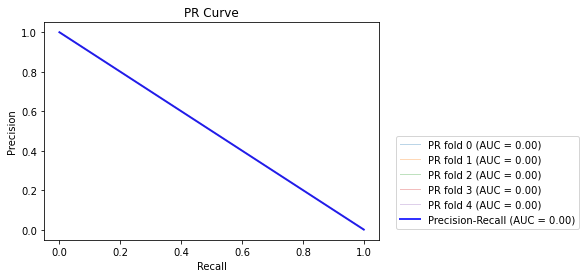

In [20]:
draw_cv_pr_curve(LinearGPClassifier(), StratifiedKFold(n_splits=5) , X, y, title='PR Curve')